In [1]:
%reset -fs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
linear_reg = LinearRegression()
lasso_cv = LassoCV()
lasso = Lasso()
ridge_cv = RidgeCV()
ridge_reg = Ridge()
elastic_cv = ElasticNetCV()
elastic_net = ElasticNet()
bayesian_ridge = BayesianRidge()
log_regression = LogisticRegression()
sgd_reg = SGDRegressor()
scaler = StandardScaler()

In [3]:
df = pd.read_csv('modeling_dataset.csv', index_col=[0,1]);df

Age   GS  MP_x  FG_x  FGA_x  2P_x  2PA_x  3P_x  \
Name            Date                                                          
 Bogdan         2021-10-21  29.0  1.0  26.0   4.0    8.0   1.0    3.0   3.0   
                2021-10-23  29.0  1.0  27.0   2.0    7.0   1.0    4.0   1.0   
                2021-10-25  29.0  1.0  25.0   5.0    9.0   3.0    3.0   2.0   
                2021-10-27  29.0  1.0  31.0   4.0   12.0   2.0    6.0   2.0   
                2021-10-28  29.0  1.0  34.0   6.0   11.0   5.0    7.0   1.0   
...                          ...  ...   ...   ...    ...   ...    ...   ...   
Ziaire Williams 2021-11-22  20.0  0.0  29.0   3.0    6.0   2.0    3.0   1.0   
                2022-01-09  20.0  1.0  27.0   4.0    9.0   3.0    5.0   1.0   
                2022-01-17  20.0  1.0  18.0   0.0    4.0   0.0    1.0   0.0   
                2022-01-19  20.0  1.0  33.0   4.0   11.0   3.0    4.0   1.0   
                2022-01-21  20.0  1.0  31.0   6.0    8.0   4.0    5.0   2.0   

                            3PA_x  FT_x  FTA_x    TS%  ORB  DRB  TRB  AST  \
Name            Date                                                        
 Bogdan         2021-10-21    5.0   0.0    0.0  0.688  0.0  3.0  3.0  2.0   
                2021-10-23    3.0   0.0    0.0  0.357  0.0  2.0  2.0  2.0   
                2021-10-25    6.0   2.0    2.0  0.709  1.0  2.0  3.0  1.0   
                2021-10-27    6.0   2.0    2.0  0.466  1.0  2.0  3.0  3.0   
                2021-10-28    4.0   1.0    1.0  0.612  0.0  6.0  6.0  4.0   
...                           ...   ...    ...    ...  ...  ...  ...  ...   
Ziaire Williams 2021-11-22    3.0   1.0    2.0  0.581  0.0  4.0  4.0  1.0   
                2022-01-09    4.0   0.0    0.0  0.500  0.0  2.0  2.0  3.0   
                2022-01-17    3.0   2.0    2.0  0.205  0.0  3.0  3.0  1.0   
                2022-01-19    7.0   1.0    1.0  0.437  0.0  1.0  1.0  1.0   
                2022-01-21    3.0   3.0    4.0  0.871  1.0  4.0  5.0  0.0   

                            STL  BLK  TOV   PF  PTS_x  GmSc   BPM  FG_y  \
Name            Date                                                      
 Bogdan         2021-10-21  2.0  0.0  2.0  3.0   11.0   8.1   2.8  45.0   
                2021-10-23  0.0  0.0  0.0  2.0    5.0   2.1  -5.6  38.0   
                2021-10-25  0.0  0.0  0.0  1.0   14.0  11.3   1.9  46.0   
                2021-10-27  0.0  1.0  0.0  2.0   12.0   8.5   0.3  40.0   
                2021-10-28  1.0  0.0  0.0  5.0   14.0  12.3   0.1  48.0   
...                         ...  ...  ...  ...    ...   ...   ...   ...   
Ziaire Williams 2021-11-22  0.0  0.0  0.0  2.0    8.0   5.7  -4.7  42.0   
                2022-01-09  1.0  0.0  1.0  4.0    9.0   5.4  -7.3  47.0   
                2022-01-17  0.0  0.0  2.0  2.0    2.0  -2.0 -17.9  47.0   
                2022-01-19  1.0  0.0  0.0  1.0   10.0   5.5  -6.3  44.0   
                2022-01-21  2.0  1.0  0.0  4.0   17.0  16.4   8.1  43.0   

                            FGA_y  2P_y  2PA_y  3P_y  3PA_y  FT_y  FTA_y  \
Name            Date                                                       
 Bogdan         2021-10-21   94.0  30.0   59.0  15.0   35.0   8.0    9.0   
                2021-10-23   99.0  28.0   65.0  10.0   34.0   9.0   15.0   
                2021-10-25   90.0  34.0   58.0  12.0   32.0  18.0   21.0   
                2021-10-27   96.0  32.0   66.0   8.0   30.0  14.0   17.0   
                2021-10-28   88.0  42.0   67.0   6.0   21.0   9.0   14.0   
...                           ...   ...    ...   ...    ...   ...    ...   
Ziaire Williams 2021-11-22   95.0  29.0   60.0  13.0   35.0  22.0   27.0   
                2022-01-09   86.0  36.0   56.0  11.0   30.0  22.0   32.0   
                2022-01-17   92.0  37.0   67.0  10.0   25.0  15.0   20.0   
                2022-01-19  106.0  35.0   66.0   9.0   40.0  17.0   25.0   
                2022-01-21   82.0  32.0   57.0  11.0   25.0  25.0   40.0   

                            PTS_y 

In [4]:
df2 = df.reset_index();df2

,Name,Date,Age,GS,MP_x,FG_x,FGA_x,2P_x,2PA_x,3P_x,3PA_x,FT_x,FTA_x,TS%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS_x,GmSc,BPM,FG_y,FGA_y,2P_y,2PA_y,3P_y,3PA_y,FT_y,FTA_y,PTS_y,FG.1,FGA.1,2P.1,2PA.1,3P.1,3PA.1,FT.1,FTA.1,PTS.1,days_rest,target_pts,rolling_avg,rolling_3pa_avg,mpg_rolling,rolling_gmsc,rolling_bpm,rolling_2pa,rolling_team_fga,rolling_fga,rolling_fta,rolling_team_fta,rolling_opp_pts,rolling_opp_fga,rolling_ts,rolling_3pa,rolling_team_3pa,rolling_team_pts,rolling_team_fg_pct,rolling_trb,rolling_stls,line,moneyline,projection,diff,7_day_acc,Team_ATL,Team_BKN,Team_BOS,Team_CHA,Team_CHI,Team_CLE,Team_DAL,Team_DEN,Team_DET,Team_GSW,Team_HOU,Team_IND,Team_LAC,Team_LAL,Team_MEM,Team_MIA,Team_MIL,Team_MIN,Team_NOR,Team_NYK,Team_OKC,Team_ORL,Team_PHI,Team_PHO,Team_POR,Team_SAC,Team_SAS,Team_TOR,Team_UTH,Team_WAS,Position_C,Position_F,Position_F-C,Position_F-G,Position_G,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOR,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHO,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTH,opponent_WAS,home_away_@,home_away_vs.,o/u_o,o/u_u,projection_right_0.0,projection_right_1.0,game_result_L,game_result_W
0,Bogdan,2021-10-21,29.0,1.0,26.0,4.0,8.0,1.0,3.0,3.0,5.0,0.0,0.0,0.688,0.0,3.0,3.0,2.0,2.0,0.0,2.0,3.0,11.0,8.1,2.8,45.0,94.0,30.0,59.0,15.0,35.0,8.0,9.0,113.0,31.0,93.0,18.0,50.0,13.0,43.0,12.0,13.0,87.0,2.312002,5.0,11.0,5.000000,26.00,8.100000,2.80,3.000000,94.000000,8.0,0.000000,9.0,87.000000,93.0,0.688000,5.000000,35.000000,113.0,0.47900,3.000000,2.000000,14.5,-115.0,15.29,0.79,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,Bogdan,2021-10-23,29.0,1.0,27.0,2.0,7.0,1.0,4.0,1.0,3.0,0.0,0.0,0.357,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,5.0,2.1,-5.6,38.0,99.0,28.0,65.0,10.0,34.0,9.0,15.0,95.0,37.0,89.0,30.0,61.0,7.0,28.0,20.0,27.0,101.0,2.000000,14.0,8.0,4.000000,26.50,5.100000,-1.40,3.500000,96.500000,7.5,0.000000,12.0,94.000000,91.0,0.522500,4.000000,34.500000,104.0,0.43150,2.500000,1.000000,15.5,-115.0,12.85,-2.65,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
2,Bogdan,2021-10-25,29.0,1.0,25.0,5.0,9.0,3.0,3.0,2.0,6.0,2.0,2.0,0.709,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,14.0,11.3,1.9,46.0,90.0,34.0,58.0,12.0,32.0,18.0,21.0,122.0,40.0,91.0,31.0,58.0,9.0,33.0,15.0,18.0,104.0,2.000000,12.0,10.0,4.666667,26.00,7.166667,-0.30,3.333333,94.333333,8.0,0.666667,15.0,97.333333,91.0,0.584667,4.666667,33.666667,110.0,0.45800,2.666667,0.666667,12.5,-125.0,13.70,1.20,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
3,Bogdan,2021-10-27,29.0,1.0,31.0,4.0,12.0,2.0,6.0,2.0,6.0,2.0,2.0,0.466,1.0,2.0,3.0,3.0,0.0,1.0,0.0,2.0,12.0,8.5,0.3,40.0,96.0,32.0,66.0,8.0,30.0,14.0,17.0,102.0,40.0,93.0,29.0,57.0,11.0,36.0,8.0,9.0,99.0,2.000000,14.0,10.5,5.000000,27.25,7.500000,-0.15,4.000000,94.750000,9.0,1.000000,15.5,97.750000,91.5,0.555000,5.000000,32.750000,108.0,0.44775,2.750000,0.500000,12.5,-105.0,16.72,4.22,0.42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0
4,Bogdan,2021-10-28,29.0,1.0,34.0,6.0,11.0,5.0,7.0,1.0,4.0,1.0,1.0,0.612,0.0,6.0,6.0,4.0,1.0,0.0,0.0,5.0,14.0,12.3,0.1,48.0,88.0,42.0,67.0,6.0,21.0,9.0,14.0,111.0,46.0,99.0,33.0,65.0,13.0,34.0,17.0,21.0,122.0,1.000000,13.0,11.2,4.800000,28.60,8.460000,-0.10,4.600000,93.400000,9.4,1.000000,15.2,102.600000,93.0,0.566400,4.800000,30.400000,108.6,0.46720,3.400000,0.600000,12.5,-113.0,15.71,3.21,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
X, y = df2.drop(columns=['Name', 'Date','target_pts']), df.target_pts;

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=2)

In [8]:
X_train_scaled = scaler.fit_transform(X_train.values)

In [9]:
X_val_scaled = scaler.fit_transform(X_val.values)

In [10]:
alphavec = 10**np.linspace(-2,2,200)

lasso_cv = LassoCV(alphas = alphavec, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [11]:
lasso_cv.alpha_

0.11623224686798524

In [12]:
for col, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

Age             :   -0.1709109
GS              :    0.0000000
MP_x            :    0.0000000
FG_x            :    0.0000000
FGA_x           :    0.0000000
2P_x            :    0.0000000
2PA_x           :    0.0999889
3P_x            :   -0.0000000
3PA_x           :    0.0000000
FT_x            :    0.0070776
FTA_x           :    0.0000000
TS%             :   -0.0000000
ORB             :   -0.0000000
DRB             :    0.0248497
TRB             :    0.0000000
AST             :    0.0409515
STL             :   -0.0000000
BLK             :    0.0000000
TOV             :    0.0000000
PF              :   -0.0000000
PTS_x           :    0.0000000
GmSc            :    0.0000000
BPM             :    0.0000000
FG_y            :   -0.0887403
FGA_y           :   -0.0000000
2P_y            :   -0.0000000
2PA_y           :   -0.0000000
3P_y            :   -0.0000000
3PA_y           :    0.0000000
FT_y            :    0.0000000
FTA_y           :    0.0000000
PTS_y           :   -0.0000000
FG.1    

In [15]:
print('R2 for LassoCV Model on train set: ' + str(lasso_cv.score(X_train_scaled, y_train)))

R2 for LassoCV Model on train set: 0.4832323509558937


In [17]:
val_set_preds = lasso_cv.predict(X_val_scaled)

array([ 6.46012107, 11.77611104,  6.40812391, ..., 26.56582047,
        9.8227753 , 24.33669521])

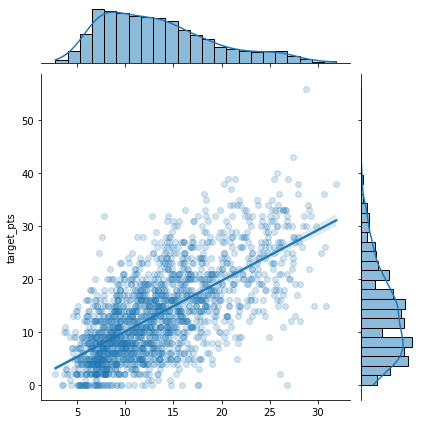

In [18]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [21]:
print('R2 for LassoCV Model on validation set: ' + str(lasso_cv.score(X_val_scaled, y_val)))

R2 for LassoCV Model on validation set: 0.4408583813163165


In [19]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for LassoCV model on validation set: ' + str(mae))

Mean absolute error for LassoCV model on validation set: 4.898440601305057


In [20]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for LassoCV model on validation set: ' + str(rmse))

Root mean squared error for LassoCV model on validation set: 6.207292308965643


In [39]:
df3 = df2[['target_pts', '2PA_x', 'FT_x', 'DRB', 'AST', 'rolling_2pa', 'line', 'projection', 'Age', 'FG_y', 'rolling_opp_fga', 'moneyline', 'game_result_W', 'Team_CHA', 'Team_LAC', 'Team_MIA', 'Team_MIN', 'Team_ORL', 'Position_F-G', 'opponent_ATL', 'opponent_BOS', 'opponent_CLE', 'opponent_GSW', 'opponent_LAL', 'opponent_UTH', 'opponent_TOR', 'projection_right_1.0']]; df3

,target_pts,2PA_x,FT_x,DRB,AST,rolling_2pa,line,projection,Age,FG_y,rolling_opp_fga,moneyline,game_result_W,Team_CHA,Team_LAC,Team_MIA,Team_MIN,Team_ORL,Position_F-G,opponent_ATL,opponent_BOS,opponent_CLE,opponent_GSW,opponent_LAL,opponent_UTH,opponent_TOR,projection_right_1.0
0,5.0,3.0,0.0,3.0,2.0,3.000000,14.5,15.29,29.0,45.0,93.0,-115.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,14.0,4.0,0.0,2.0,2.0,3.500000,15.5,12.85,29.0,38.0,91.0,-115.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.0,3.0,2.0,2.0,1.0,3.333333,12.5,13.70,29.0,46.0,91.0,-125.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14.0,6.0,2.0,2.0,3.0,4.000000,12.5,16.72,29.0,40.0,91.5,-105.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13.0,7.0,1.0,6.0,4.0,4.600000,12.5,15.71,29.0,48.0,93.0,-113.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,3.0,3.0,1.0,4.0,1.0,2.600000,8.5,8.00,20.0,42.0,88.4,-115.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8816,17.0,5.0,0.0,2.0,3.0,3.600000,8.5,6.11,20.0,47.0,92.0,-105.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8817,10.0,1.0,2.0,3.0,1.0,3.400000,9.5,8.70,20.0,47.0,91.6,-103.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8818,17.0,4.0,1.0,1.0,1.0,3.200000,9.5,8.90,20.0,44.0,91.6,100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
numeric_df = df3.loc[:,['target_pts', '2PA_x', 'FT_x', 'DRB', 'AST', 'rolling_2pa', 'line', 'projection', 'Age', 'FG_y', 'rolling_opp_fga', 'moneyline']]

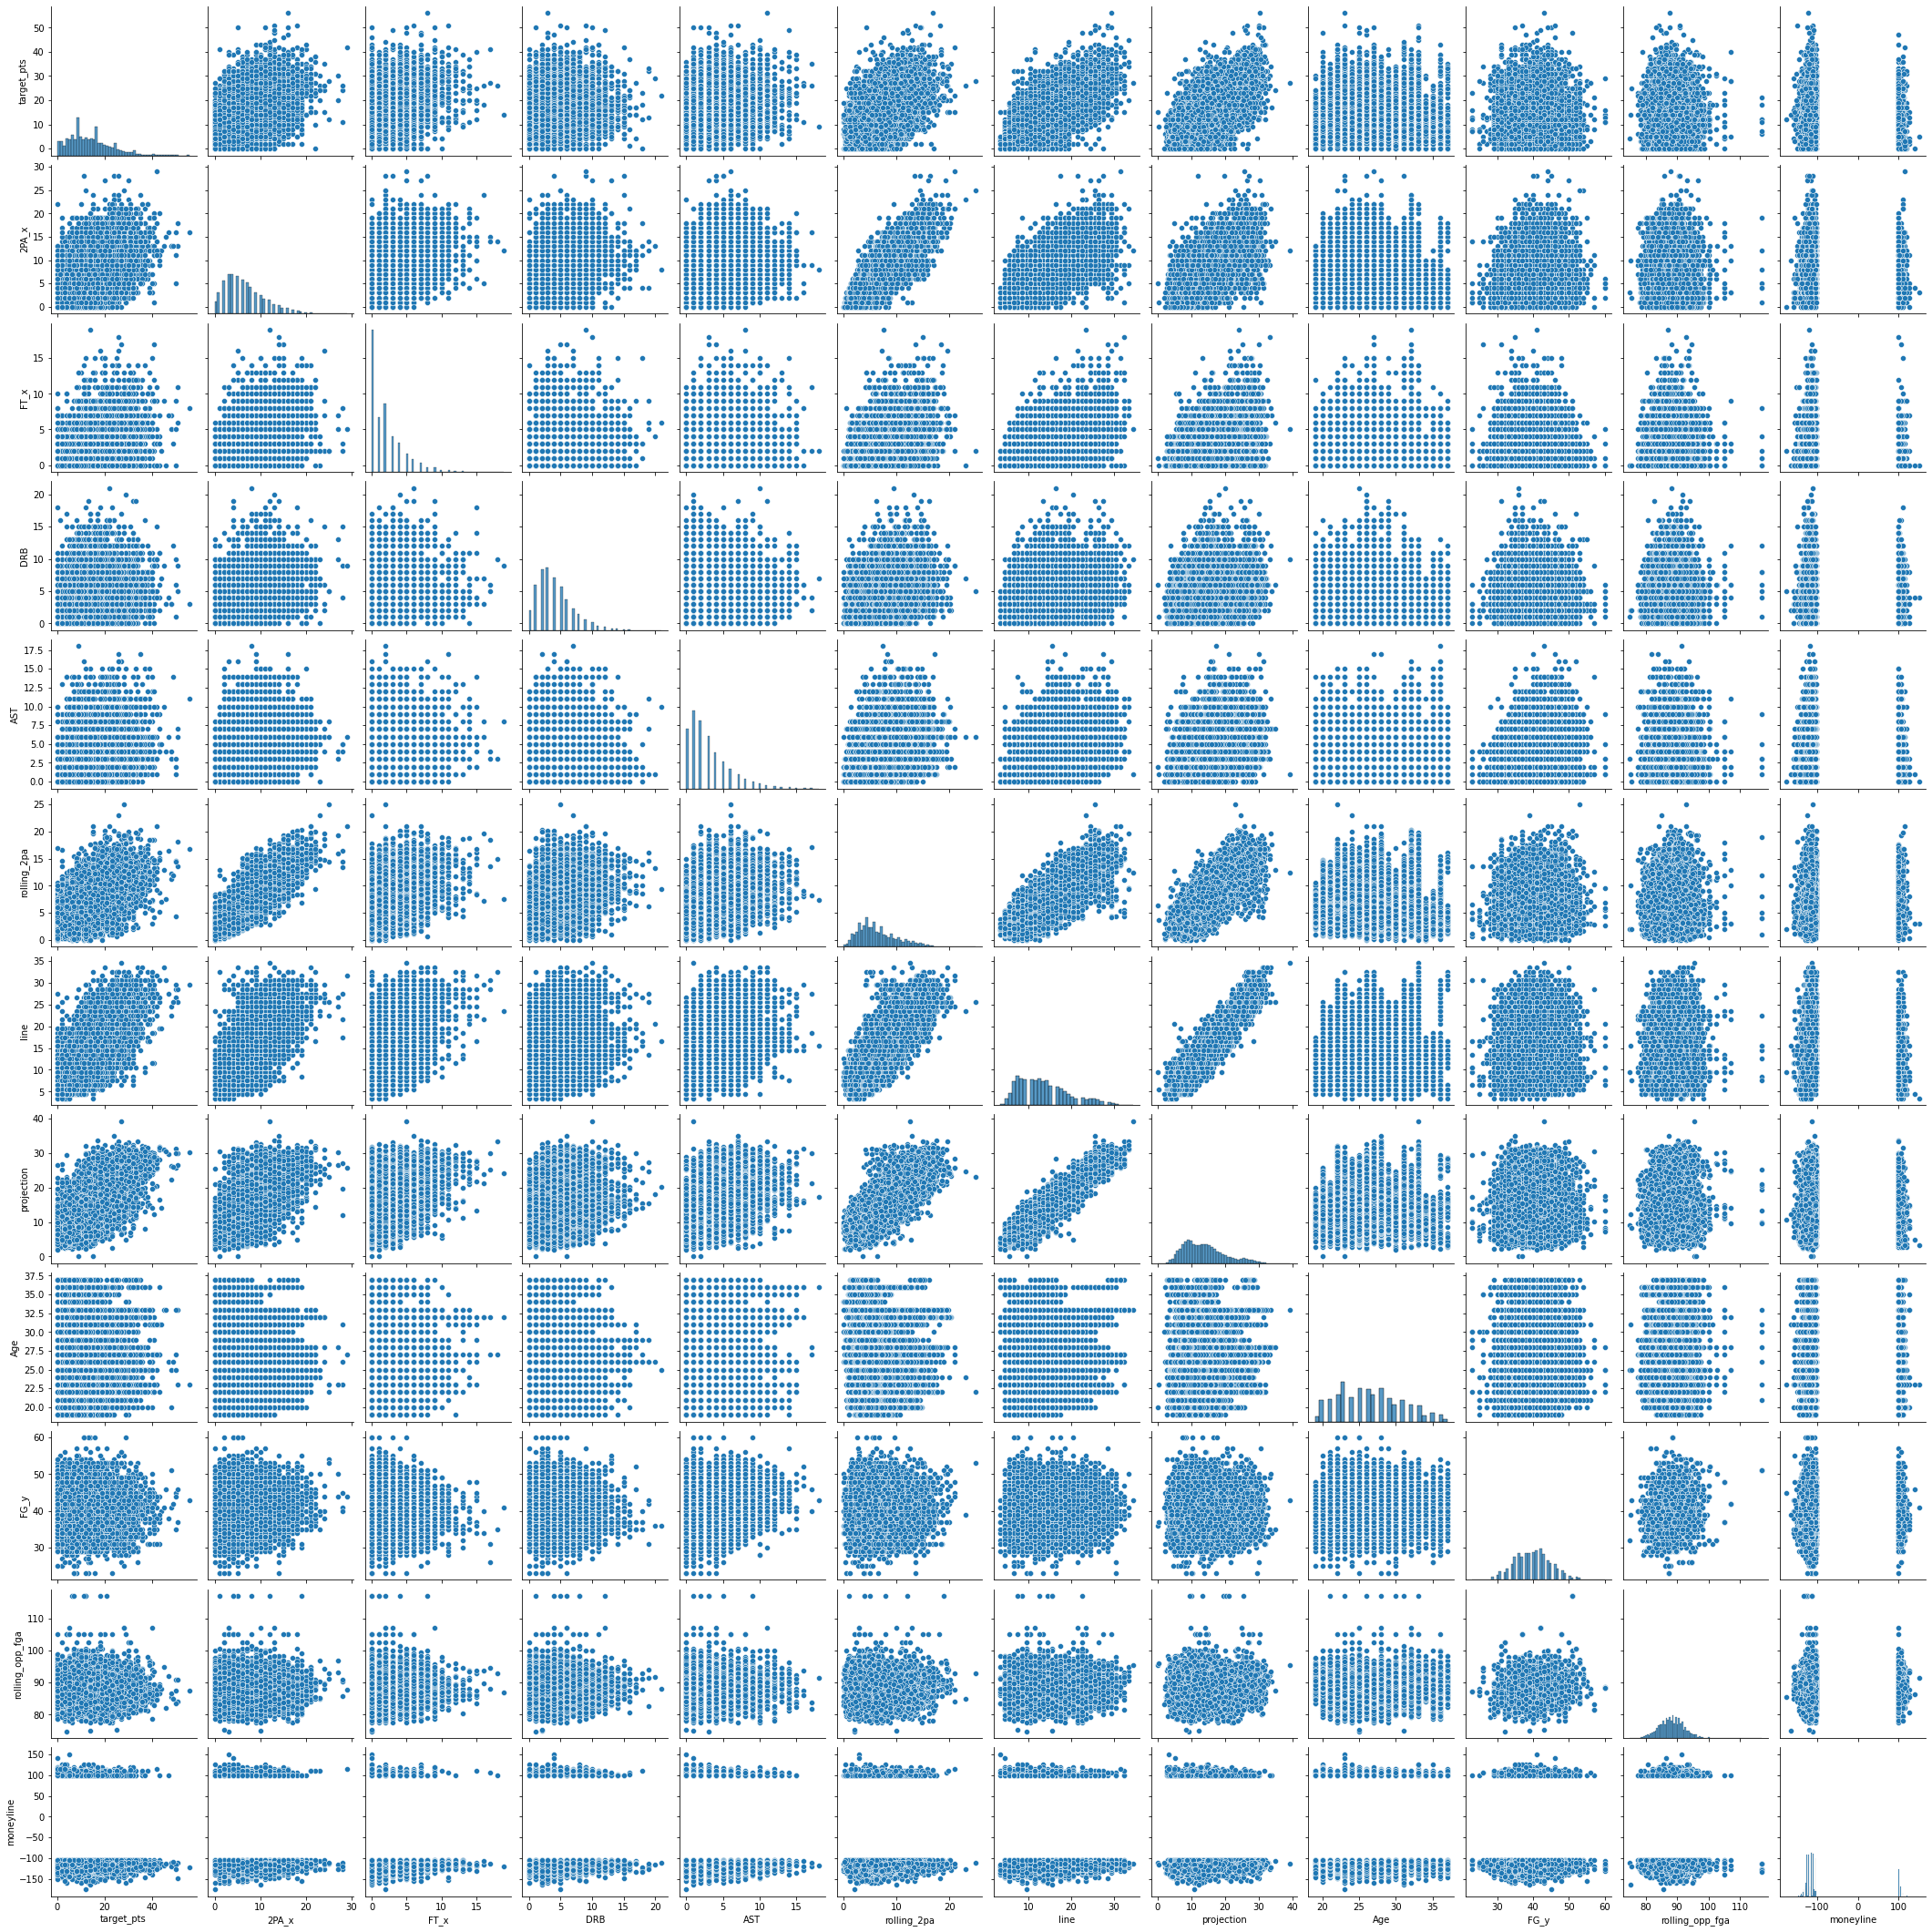

In [41]:
sns.pairplot(numeric_df)

In [42]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_pts       8820 non-null   float64
 1   2PA_x            8820 non-null   float64
 2   FT_x             8820 non-null   float64
 3   DRB              8820 non-null   float64
 4   AST              8820 non-null   float64
 5   rolling_2pa      8820 non-null   float64
 6   line             8820 non-null   float64
 7   projection       8820 non-null   float64
 8   Age              8820 non-null   float64
 9   FG_y             8820 non-null   float64
 10  rolling_opp_fga  8820 non-null   float64
 11  moneyline        8820 non-null   float64
dtypes: float64(12)
memory usage: 827.0 KB


In [43]:
numeric_df.describe()

,target_pts,2PA_x,FT_x,DRB,AST,rolling_2pa,line,projection,Age,FG_y,rolling_opp_fga,moneyline
count,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000
mean,13.372562,6.575283,2.065193,4.111451,3.027778,6.520384,13.627778,13.701304,26.486848,40.003628,88.321419,-91.514399
std,8.461848,4.416760,2.469166,2.886826,2.776029,3.706571,5.877216,6.083331,4.301874,5.119348,4.000670,70.953368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.020000,19.000000,23.000000,74.800000,-175.000000
25%,7.000000,3.000000,0.000000,2.000000,1.000000,3.800000,8.500000,9.010000,23.000000,36.000000,85.600000,-122.000000
50%,12.000000,6.000000,1.000000,4.000000,2.000000,5.800000,12.500000,12.800000,26.000000,40.000000,88.200000,-115.000000
75%,19.000000,9.000000,3.000000,6.000000,4.000000,8.600000,17.500000,17.132500,29.000000,43.000000,90.800000,-107.000000
max,56.000000,29.000000,19.000000,21.000000,18.000000,25.000000,34.500000,39.300000,37.000000,60.000000,117.000000,150.000000


In [44]:
X, y = df3.drop(columns='target_pts'), df3.target_pts

In [45]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=3)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)

In [47]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
print('R2 Score for Simple Linear Regression on Training Set using selected features: ' + str(linear_reg.score(X_train, y_train)))

R2 Score for Simple Linear Regression on Training Set using selected features: 0.4744871740275659


In [50]:
val_set_preds = linear_reg.predict(X_val)

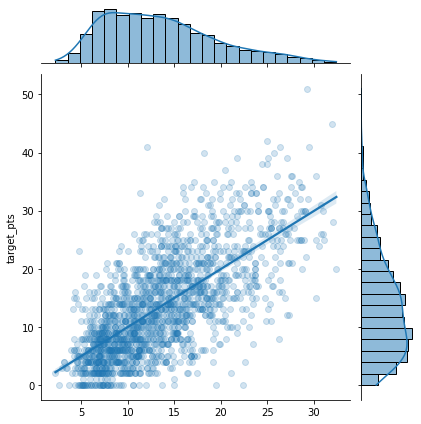

In [62]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [63]:
print('R2 for Linear Regression model on validation set: ' + str(linear_reg.score(X_val, y_val)))

R2 for Linear Regression model on validation set: 0.4750733682628333


In [64]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Linear Regression model on validation set: ' + str(mae))

Mean absolute error for Linear Regression model on validation set: 4.8909022544599665


In [65]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Linear Regression model on validation set: ' + str(rmse))

Root mean squared error for Linear Regression model on validation set: 6.223149544274893


In [96]:
poly = PolynomialFeatures(degree=2)

In [97]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)

In [99]:
X_train_poly = poly.fit_transform(X_train)

In [100]:
X_val_poly = poly.transform(X_val)

In [101]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [102]:
print('R2 Score for Polynomial Linear Regression using training set: ' + str(lr_poly.score(X_train_poly, y_train)))

R2 Score for Polynomial Linear Regression using training set: 0.6668038194990697


In [103]:
import scipy.stats as stats

In [104]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

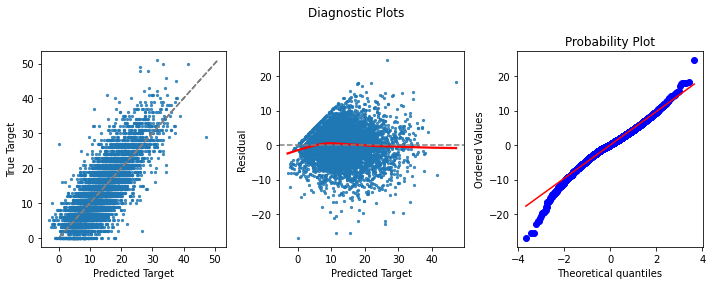

In [105]:
diagnostic_plots(lr_poly.predict(X_train_poly), y_train)

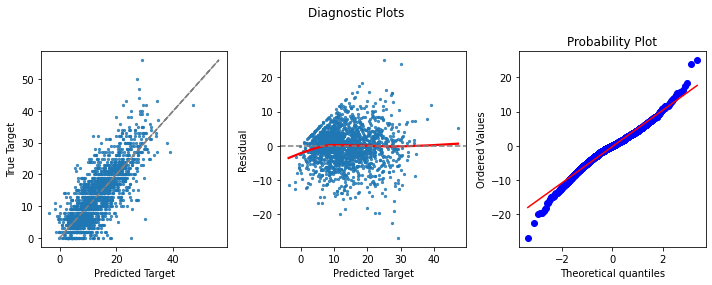

In [106]:
diagnostic_plots(lr_poly.predict(X_val_poly), y_val)

In [107]:
print('R2 Score for Polynomial Linear Regression using validation set: ' + str(lr_poly.score(X_val_poly, y_val)))

R2 Score for Polynomial Linear Regression using validation set: 0.6052290524194004
